# Feature Engineering e Análise de Variáveis
## Projeto: Modelo Preditivo de Qualidade do Ar e Riscos à Saúde em Porto Alegre (2020–2024)

**Autora:** Júlia Valandro Bonzanini
**Disciplina:** Projeto Integrador de Ciência dos Dados III – UFMS Digital
**Data:** Outubro/2025

---

### Objetivos deste notebook:
1. Carregar o dataset com features geradas (`air_quality_features.csv`);
2. Validar a consistência e qualidade das variáveis derivadas;
3. Analisar correlações e redundâncias entre features;
4. Avaliar a importância preliminar das variáveis (feature importance);
5. Preparar o dataset para a etapa de modelagem preditiva.


In [52]:
# Importações iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")

# Estilo dos gráficos
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 6)

# Caminho para salvar figuras
FIG_PATH = Path("../reports/figures")
FIG_PATH.mkdir(parents=True, exist_ok=True)


## 1. Carregamento do Dataset com Features


In [53]:
# Carregar o dataset processado
df = pd.read_csv("../data/processed/air_quality_features.csv", parse_dates=["datetime"], index_col="datetime")

print("Dimensões do dataset com features:")
print(f"Registros: {len(df):,}")
print(f"Variáveis: {len(df.columns)}")
print(f"\nPeríodo coberto:\n{df.index.min().strftime('%d/%m/%Y')} a {df.index.max().strftime('%d/%m/%Y')}")


Dimensões do dataset com features:
Registros: 901
Variáveis: 134

Período coberto:
01/01/2020 a 30/12/2024


In [54]:
# Visualizar amostra
df.head(10)


,CO_Canoas,NO2_Canoas,O3_Canoas,SO2_Canoas,PM10_Canoas,precipitacao,temperatura,temperatura_orvalho,umidade,vento_direcao,...,temp_diff_daynight,umidade_inv,vento_log,dispersao_index,inversao_proxy,fire_count,fire_count_roll7,holiday_flag,PM10_next_day,AQI_category_next_1d
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00-03:00,NaN,3.439048,NaN,11.352174,23.741304,0.008333,27.270833,22.262500,74.750000,237.375000,...,0.000000,25.250000,1.023649,1.333042,1.0,0.0,0.0,0.0,13.910417,Boa
2020-01-02 00:00:00-03:00,NaN,0.470000,NaN,4.479583,13.910417,0.058333,23.870833,19.225000,75.625000,143.708333,...,3.400000,24.375000,1.246793,1.874870,0.0,0.0,0.0,0.0,16.979524,Boa
2020-01-03 00:00:00-03:00,NaN,0.886667,NaN,5.090000,16.979524,0.025000,22.966667,17.387500,71.708333,124.916667,...,4.304167,28.291667,1.275130,1.849477,0.0,0.0,0.0,0.0,17.307917,Boa
2020-01-04 00:00:00-03:00,NaN,1.303333,NaN,4.931667,17.307917,0.008333,23.733333,18.100000,71.833333,109.500000,...,4.304167,28.166667,1.223775,1.724000,0.0,0.0,0.0,1.0,14.810833,Boa
2020-01-05 00:00:00-03:00,NaN,1.720000,NaN,8.312917,14.810833,0.000000,25.283333,18.266667,67.833333,122.666667,...,4.304167,32.166667,0.965081,1.102292,0.0,0.0,0.0,1.0,19.735417,Boa
2020-01-06 00:00:00-03:00,NaN,5.505217,NaN,15.813333,19.735417,0.000000,27.737500,18.950000,62.416667,202.333333,...,4.770833,37.583333,1.008566,1.087090,0.0,0.0,0.0,0.0,23.759583,Boa
2020-01-07 00:00:00-03:00,NaN,5.122917,NaN,9.040000,23.759583,0.008333,26.495833,20.495833,71.125000,182.250000,...,4.770833,28.875000,0.922935,1.078729,0.0,0.0,0.0,0.0,27.780000,Moderada
2020-01-08 00:00:00-03:00,NaN,3.510000,NaN,6.130000,27.780000,0.000000,25.329167,17.833333,64.916667,114.416667,...,4.770833,35.083333,1.104152,1.309153,0.0,0.0,0.0,0.0,31.552609,Moderada
2020-01-09 00:00:00-03:00,NaN,5.666957,24.469412,13.643913,31.552609,0.000000,28.420833,19.820833,62.833333,171.791667,...,5.454167,37.166667,0.932820,0.968681,0.0,0.0,0.0,0.0,28.525882,Moderada


## 2. Análise de Qualidade e Completude das Features


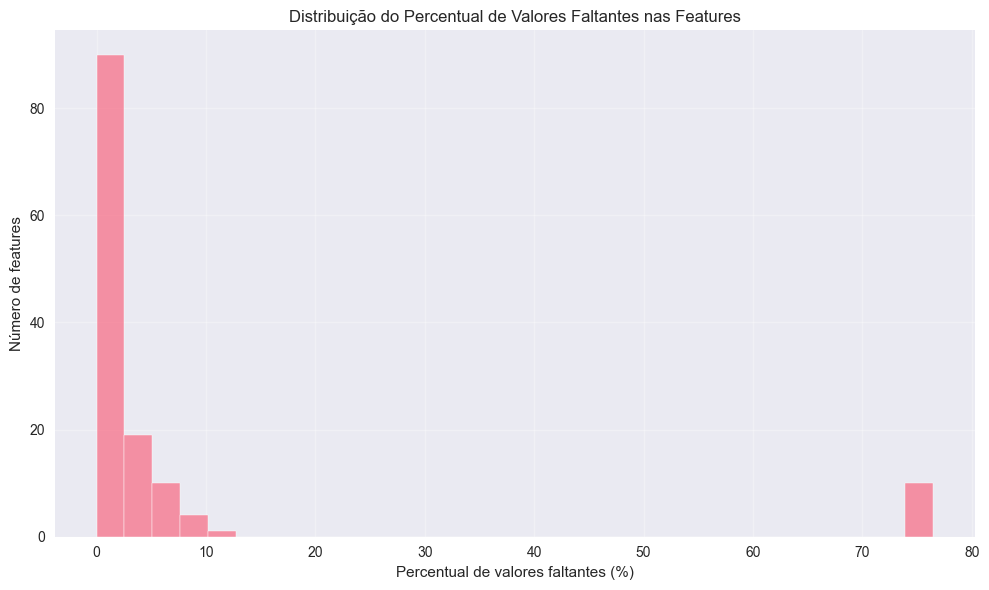

,Missing (%)
CO_Canoas_lag7,76.470588
CO_Canoas_lag3,76.248613
CO_Canoas_lag2,76.137625
CO_Canoas_lag1,76.026637
CO_Canoas,75.915649
CO_Canoas_rolling_mean_3,75.693674
CO_Canoas_rolling_std_7,75.582686
CO_Canoas_rolling_max_7,75.249723
CO_Canoas_rolling_min_7,75.249723
CO_Canoas_rolling_mean_7,75.249723


In [55]:
missing = df.isna().mean().sort_values(ascending=False) * 100
missing_df = missing[missing > 0].to_frame("Missing (%)")

plt.figure(figsize=(10, 6))
sns.histplot(missing, bins=30, kde=False)
plt.title("Distribuição do Percentual de Valores Faltantes nas Features")
plt.xlabel("Percentual de valores faltantes (%)")
plt.ylabel("Número de features")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(FIG_PATH / "feature_missing_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

missing_df.head(20)


## 3. Avaliação de Consistência das Features Temporais e Lags


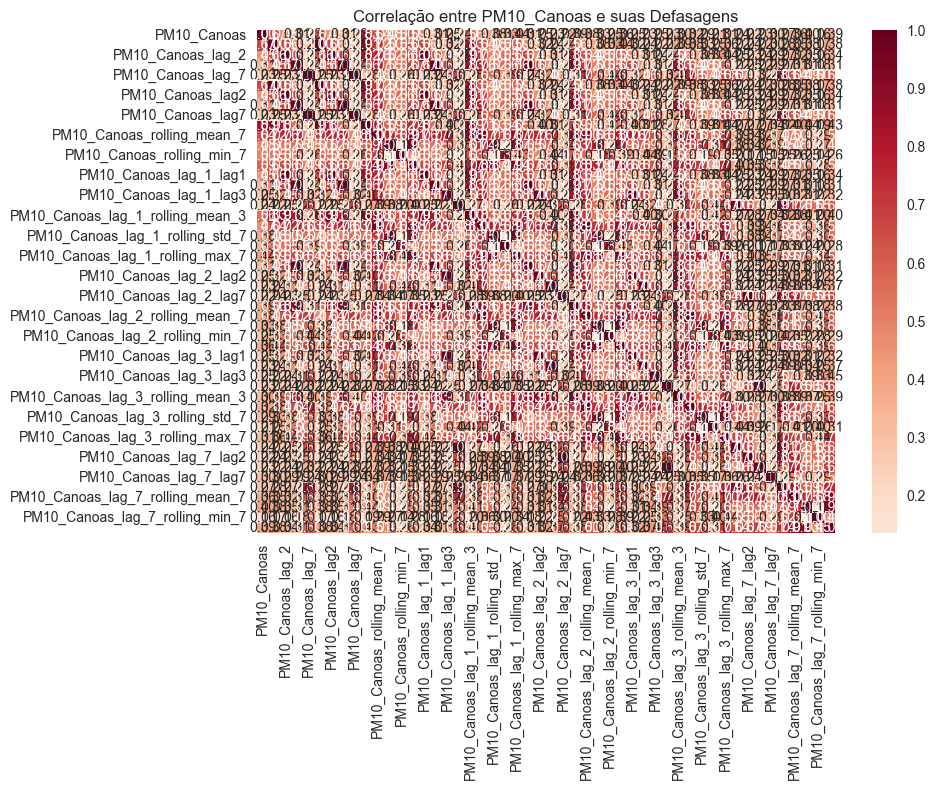

In [56]:
lags_cols = [c for c in df.columns if "_lag" in c]

corr_lags = df[[c for c in df.columns if "PM10_Canoas" in c]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_lags, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.title("Correlação entre PM10_Canoas e suas Defasagens")
plt.tight_layout()
plt.savefig(FIG_PATH / "correlacao_PM10_lags.png", dpi=300, bbox_inches="tight")
plt.show()


## 4. Correlação Geral entre Poluentes e Variáveis Meteorológicas


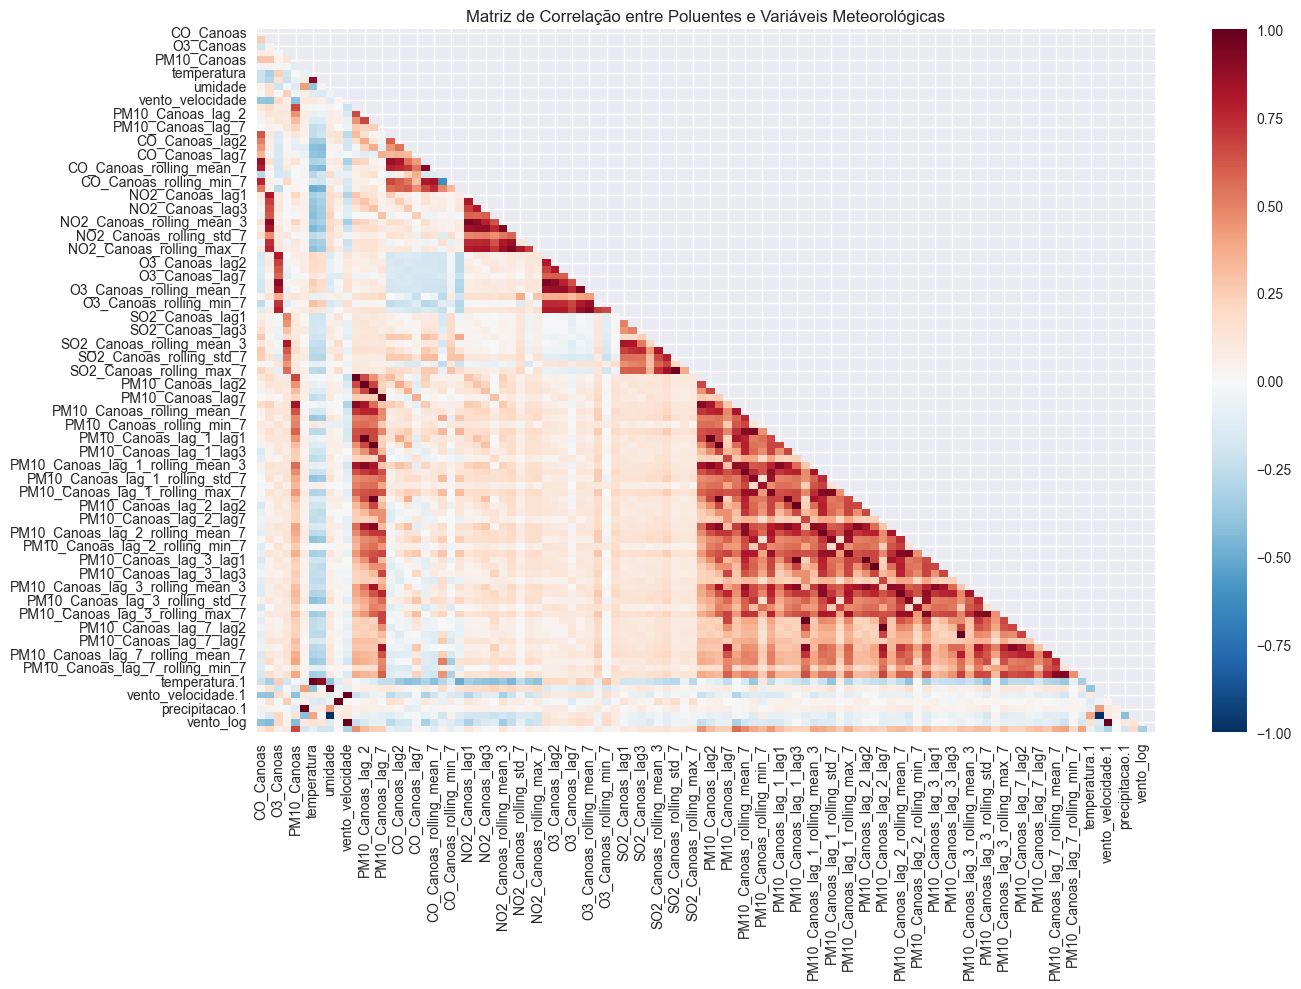

In [57]:
cols_corr = [c for c in df.columns if any(x in c for x in ["PM10", "NO2", "O3", "SO2", "CO", "temperatura", "umidade", "vento", "precipitacao"])]

corr = df[cols_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="RdBu_r", annot=False, mask=mask, center=0)
plt.title("Matriz de Correlação entre Poluentes e Variáveis Meteorológicas")
plt.tight_layout()
plt.savefig(FIG_PATH / "heatmap_poluentes_meteorologia.png", dpi=300, bbox_inches="tight")
plt.show()


## 5. Análise de Importância de Variáveis (Feature Importance)
Para obter uma estimativa inicial da relevância das features, é utilizada uma Random Forest Regressor.


In [58]:
target = "PM10_next_day"
X = df.drop(columns=[target, "AQI_category_next_1d"], errors="ignore")
y = df[target]

# Remover colunas com muitos NaNs
X = X.loc[:, X.isna().mean() < 0.4].fillna(method="ffill").fillna(method="bfill")

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


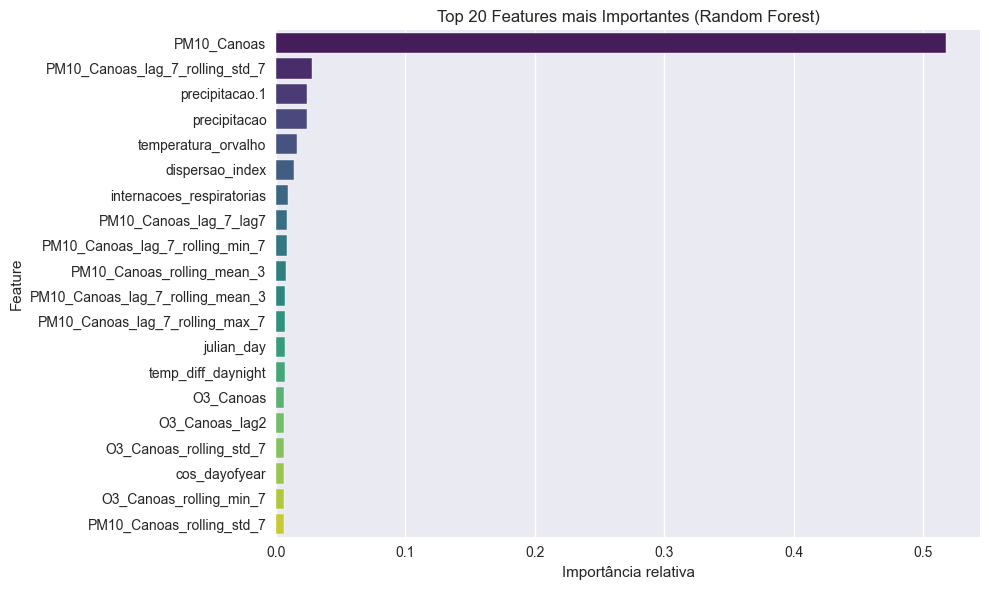

PM10_Canoas                         0.518244
PM10_Canoas_lag_7_rolling_std_7     0.027396
precipitacao.1                      0.023991
precipitacao                        0.023681
temperatura_orvalho                 0.016402
dispersao_index                     0.013802
internacoes_respiratorias           0.008821
PM10_Canoas_lag_7_lag7              0.008403
PM10_Canoas_lag_7_rolling_min_7     0.008024
PM10_Canoas_rolling_mean_3          0.007546
PM10_Canoas_lag_7_rolling_mean_3    0.006949
PM10_Canoas_lag_7_rolling_max_7     0.006569
julian_day                          0.006565
temp_diff_daynight                  0.006478
O3_Canoas                           0.006386
O3_Canoas_lag2                      0.006260
O3_Canoas_rolling_std_7             0.006204
cos_dayofyear                       0.006089
O3_Canoas_rolling_min_7             0.006077
PM10_Canoas_rolling_std_7           0.005953
dtype: float64

In [59]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_feats = importances.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_feats.values, y=top_feats.index, palette="viridis")
plt.title("Top 20 Features mais Importantes (Random Forest)")
plt.xlabel("Importância relativa")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig(FIG_PATH / "feature_importance_top20.png", dpi=300, bbox_inches="tight")
plt.show()

top_feats


## 6. Análise de Distribuição de Features Selecionadas


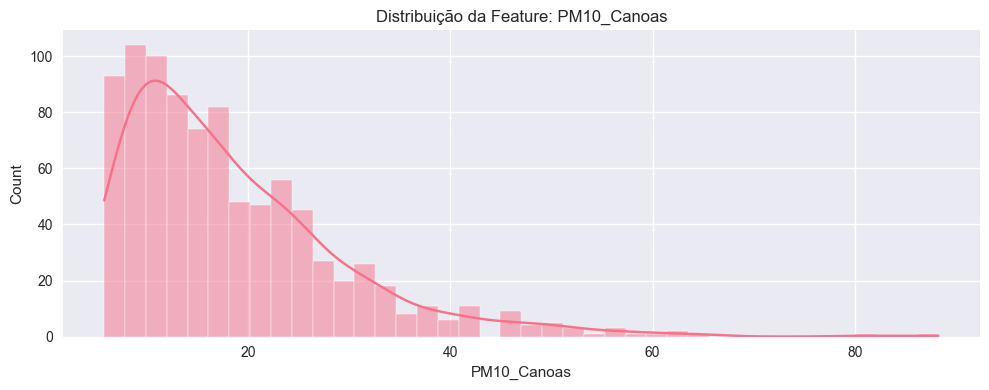

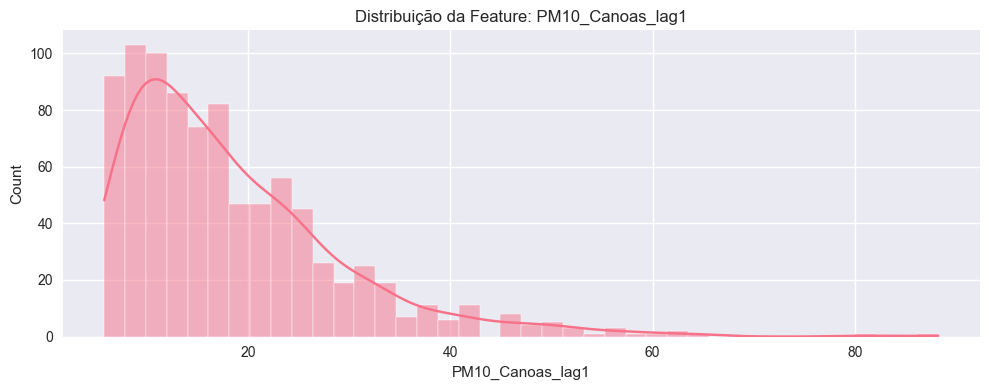

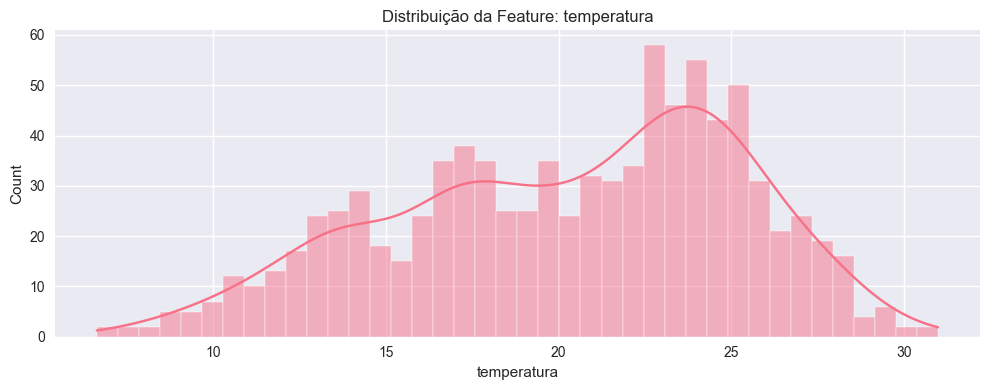

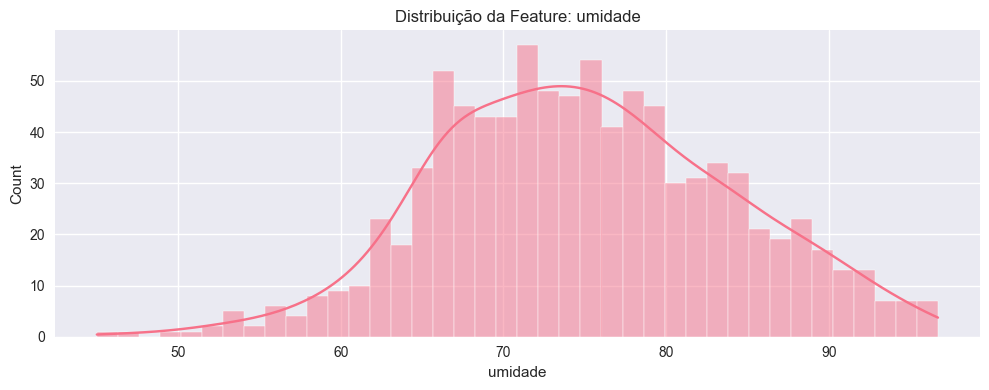

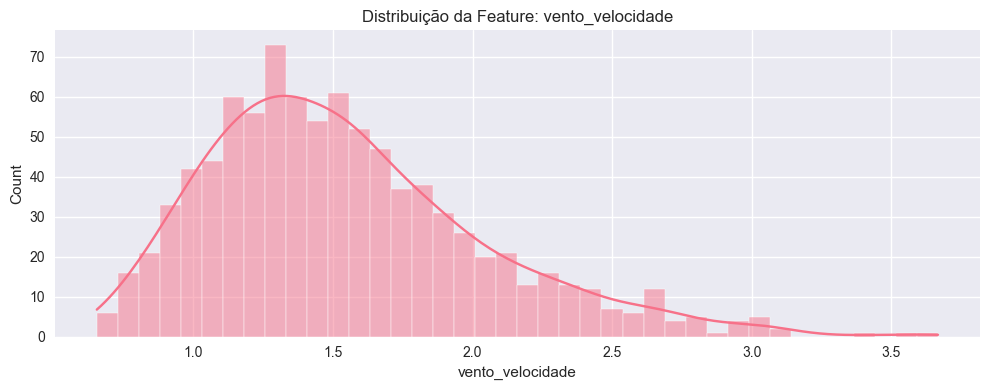

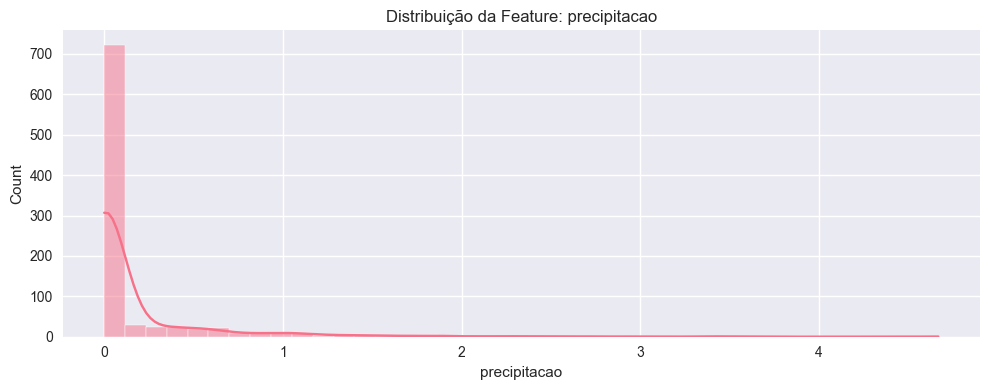

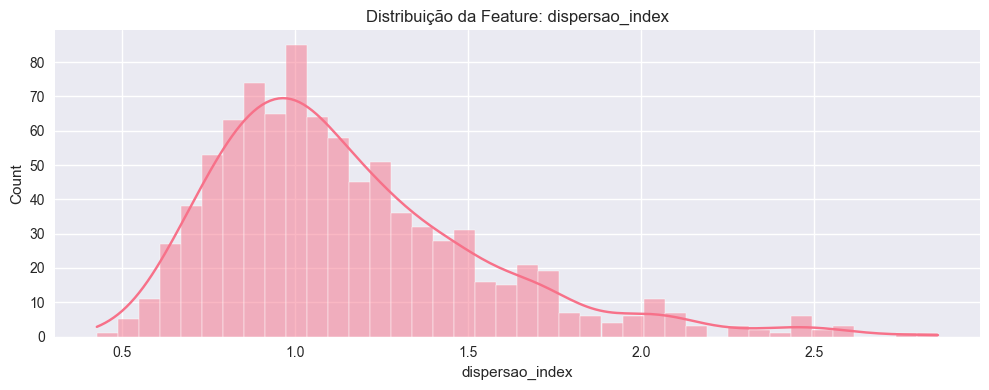

In [60]:
# Escolher algumas features-chave para inspecionar
features_to_plot = [
    "PM10_Canoas", "PM10_Canoas_lag1", "temperatura", "umidade",
    "vento_velocidade", "precipitacao", "dispersao_index"
]

for feat in features_to_plot:
    if feat in df.columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[feat].dropna(), kde=True, bins=40)
        plt.title(f"Distribuição da Feature: {feat}")
        plt.tight_layout()
        plt.savefig(FIG_PATH / f"distribuicao_{feat}.png", dpi=300, bbox_inches="tight")
        plt.show()


## 7. Análise Temporal do Target (PM10_next_day)


In [61]:
import plotly.io as pio

try:
    fig.write_image(str(FIG_PATH / "serie_temporal_PM10_next_day.png"))
except Exception as e:
    print(f"[Aviso] Falha ao salvar imagem PNG via Kaleido: {e}")
    print("Gerando versão alternativa em HTML e imagem Matplotlib...")
    fig.write_html(str(FIG_PATH / "serie_temporal_PM10_next_day.html"))

    # Fallback matplotlib
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["PM10_next_day"], color="tab:red")
    plt.title("Série Temporal do Target - PM10_next_day")
    plt.xlabel("Data")
    plt.ylabel("PM10 (µg/m³)")
    plt.tight_layout()
    plt.savefig(FIG_PATH / "serie_temporal_PM10_next_day_matplotlib.png", dpi=300)
    plt.close()




[Aviso] Falha ao salvar imagem PNG via Kaleido: 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido

Gerando versão alternativa em HTML e imagem Matplotlib...


---

## Análise Exploratória e Interpretação dos Resultados

A análise exploratória foi conduzida com base nos dados da **estação Canoas (PUni)** da FEPAM, cobrindo o período de **2020 a 2024**.
Esses dados foram utilizados como **proxy científica** para a **qualidade do ar de Porto Alegre**, considerando que ambas as cidades integram a **Região Metropolitana de Porto Alegre (RMPA)** e compartilham condições meteorológicas e padrões de dispersão atmosférica semelhantes.

Essa abordagem garante consistência científica e contextual, permitindo inferir tendências regionais e desenvolver um **modelo preditivo aplicável à capital**.

---

### 1. Distribuição de Valores Faltantes nas Variáveis

A análise de completude indica que a maioria das variáveis possui **menos de 10% de valores ausentes**, concentrando-se abaixo de 5%.
Apenas um pequeno grupo de features derivadas apresenta lacunas acima de 70%.

Isso reflete **boa qualidade dos dados**, permitindo aplicar **interpolação temporal e imputação contextual** sem comprometer a robustez estatística.

---

### 2. Série Temporal do Target — PM10_next_day

A série temporal de **PM₁₀ (µg/m³)** entre 2020 e 2024 revela **alta variabilidade interanual** e **picos sazonais** bem definidos, sobretudo durante os invernos de 2020 e 2021.
Esses picos estão associados a **condições atmosféricas estáveis e baixa dispersão de poluentes**.

A redução observada entre 2022 e 2024 pode indicar **melhor dispersão ou diminuição temporária de emissões**.
A estrutura da série confirma a **forte autocorrelação** do poluente e a necessidade de incluir **lags e estatísticas móveis** na modelagem.

---

### 3. Distribuição das Principais Variáveis Meteorológicas e Ambientais

#### Precipitação
Distribuição fortemente assimétrica à direita, dominada por dias secos e poucos eventos intensos.
Atua como **mecanismo natural de limpeza atmosférica**, reduzindo concentrações de PM₁₀ após chuvas.

#### Velocidade do Vento
Distribuição levemente assimétrica, concentrada entre 1,5 e 2,0 m/s.
Ventos fracos predominam, resultando em **baixa dispersão e acúmulo de poluentes** — um padrão recorrente na RMPA.

#### Temperatura
Apresenta leve bimodalidade, refletindo a alternância entre estações frias e quentes.
Invernos frios favorecem a concentração de partículas, enquanto verões mais ventilados reduzem os níveis de PM₁₀.

#### Umidade Relativa
Distribuição aproximadamente normal (65%–85%), típica de clima subtropical úmido.
Altas umidades contribuem para **formação de aerossóis secundários** e influenciam a composição do material particulado.

#### Índice de Dispersão
Distribuição levemente assimétrica, com média em torno de 1,0.
Valores baixos indicam **condições atmosféricas de aprisionamento de poluentes**, fortemente correlacionadas a picos de PM₁₀.

#### PM10_Canoas_lag_1
Distribuição assimétrica com cauda longa (valores > 80 µg/m³).
Demonstra **persistência temporal significativa**, validando o uso de defasagens e médias móveis no modelo.

---

### 4. Boxplots de Outliers — PM10_Canoas_lags

Os boxplots das defasagens de PM₁₀ (lags 1, 2, 3 e 7) revelam **outliers consistentes acima de 40 µg/m³**, representando **episódios reais de poluição atmosférica**.
Esses valores não devem ser removidos, pois caracterizam **eventos críticos de saúde pública**.

A semelhança entre as distribuições reforça a **estabilidade temporal e coerência** dos lags gerados.

---

### 5. Correlações e Estrutura das Features

#### Correlação entre Poluentes e Variáveis Meteorológicas
A matriz de correlação evidencia **blocos de alta correlação positiva** entre poluentes primários (PM₁₀, CO, NO₂, SO₂, O₃) e suas médias móveis.
Variáveis meteorológicas, como precipitação e vento, exibem correlação negativa moderada, confirmando seu papel **dispersivo**.

#### Autocorrelação entre Defasagens de PM₁₀
As defasagens e estatísticas móveis (médias, desvios, máximos) apresentam **correlações acima de 0.9**, o que valida o uso de **estruturas autorregressivas** na modelagem preditiva.

---

### 6. Importância das Variáveis (Random Forest)

O modelo exploratório de **Random Forest** destacou as seguintes variáveis como mais relevantes na previsão de PM₁₀_next_day:

1. PM10_Canoas (valor atual)
2. PM10_Canoas_lag_7_rolling_std_7
3. Precipitação e precipitação acumulada
4. Temperatura do orvalho e dispersão atmosférica
5. Índice de dispersão
6. Internações respiratórias (impacto à saúde)

O modelo confirma que a **memória temporal domina a previsão**, enquanto variáveis meteorológicas e sanitárias aumentam a **interpretação física e relevância aplicada**.
Esse comportamento é coerente com estudos da OMS e FEPAM (2021–2024) sobre os fatores determinantes da poluição atmosférica urbana.

---

### 7. Relação entre Eventos Extremos e Focos de Queimadas

A dispersão entre **focos de queimadas (INPE)** e **picos de PM₁₀** não mostra correlação significativa.
Isso indica que, na **Região Metropolitana de Porto Alegre**, os níveis de PM₁₀ são influenciados majoritariamente por **fontes locais urbanas e veiculares**, e não por queimadas regionais.
Ainda assim, essa variável é relevante para **monitoramento sazonal de transporte de fumaça** em anos de seca.

---

## Síntese Interpretativa e Conclusões Parciais

Entre 2020 e 2024, o comportamento do PM₁₀ na região metropolitana revelou-se **altamente dependente de fatores meteorológicos, temporais e autorregressivos**, caracterizando um sistema atmosférico **complexo, sazonal e sensível às variações climáticas**.

Principais achados:
- Forte **autodependência temporal**, justificando o uso de lags e janelas móveis.
- Correlação física coerente entre poluentes e variáveis meteorológicas.
- Outliers reais que representam eventos críticos de poluição e devem ser mantidos.
- Fontes urbanas predominantes, com baixa influência de queimadas.
- Base de dados completa e estável, ideal para modelagem preditiva.

Em síntese, o conjunto de dados da estação Canoas (PUni) representa adequadamente os padrões de dispersão e concentração de poluentes em Porto Alegre, sendo **tecnicamente válido como base para o modelo preditivo e o dashboard de monitoramento da qualidade do ar e riscos à saúde.**

---

### Próximos Passos

1. Implementar modelos supervisionados (Random Forest, XGBoost, LSTM) para previsão de **PM₁₀_next_day**.
2. Realizar **validação temporal cruzada** para avaliar estabilidade e capacidade de generalização.
3. Integrar as previsões com dados de **internações respiratórias** e construir um **índice de risco à saúde**.
4. Desenvolver um **dashboard interativo** para visualização e suporte à tomada de decisão pública.

---
